In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm, skew, kurtosis
from scipy.special import boxcox1p

In [0]:
train = pd.read_excel("Data_set.xlsx")

In [0]:
train.head()

,Sample,TC (%),TN (%),Zn,S,K,Ca,Ti,Mn,Fe,Rb,Sr,Al,Si,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,...,2460,2461,2462,2463,2464,2465,2466,2467,2468,2469,2470,2471,2472,2473,2474,2475,2476,2477,2478,2479,2480,2481,2482,2483,2484,2485,2486,2487,2488,2489,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
0,ITA-1,43.3473,1.1198,36.5,1451,2397,21414,172,780,1609,9.7,29.2,10062.13,39006.40,-0.004079,-0.003135,-0.002168,-0.002767,-0.002948,-0.002317,-0.001404,-0.002922,-0.005383,-0.005025,-0.004544,-0.004881,-0.004034,-0.003412,-0.003799,-0.003373,-0.003005,-0.003656,-0.003032,-0.002170,-0.003135,-0.003527,-0.002916,-0.002812,-0.002507,-0.002034,...,-0.000576,-0.001044,-0.001091,-0.000934,-0.000848,-0.000803,-0.000752,-0.000667,-0.000631,-0.000768,-0.000904,-0.000738,-0.000507,-0.000822,-0.001485,-0.001555,-0.001006,-0.000512,-0.000093,0.000062,-0.000416,-0.000949,-0.001099,-0.001067,-0.000549,0.000333,0.000506,0.000026,-0.000418,-0.000938,-0.001145,-0.000503,0.000179,0.000181,-0.000007,-0.000013,0.000027,0.000090,0.000184,0.000352
1,ITA-2,31.9611,1.3723,44.4,1765,3337,18727,414,917,3176,17.0,32.2,14141.88,71818.36,-0.003471,-0.002537,-0.001896,-0.002639,-0.001939,-0.001231,-0.002312,-0.003688,-0.004396,-0.003961,-0.003259,-0.002999,-0.003021,-0.003255,-0.003510,-0.003573,-0.003527,-0.003419,-0.001721,-0.000497,-0.002307,-0.003587,-0.003236,-0.002874,-0.002296,-0.001758,...,-0.000461,-0.001023,-0.001275,-0.001395,-0.001191,-0.000597,-0.000253,-0.000236,-0.000326,-0.000669,-0.001011,-0.000861,-0.000550,-0.000725,-0.001181,-0.001263,-0.000975,-0.000663,-0.000246,-0.000111,-0.000765,-0.001421,-0.001355,-0.000995,-0.000372,0.000496,0.000547,-0.000210,-0.000746,-0.001090,-0.001067,-0.000095,0.000819,0.000664,0.000135,-0.000450,-0.001099,-0.000883,0.000060,0.000469
2,ITA-3,43.3473,1.1294,34.6,1156,1919,17868,96,784,999,6.8,25.7,4507.87,19861.80,-0.003583,-0.001364,-0.000901,-0.003630,-0.003770,-0.002516,-0.002768,-0.003846,-0.004875,-0.004790,-0.004655,-0.004620,-0.003281,-0.002915,-0.004434,-0.004534,-0.003710,-0.003444,-0.002790,-0.002308,-0.002774,-0.003749,-0.004310,-0.003520,-0.002256,-0.001714,...,-0.000756,-0.001378,-0.001564,-0.001531,-0.001246,-0.000635,-0.000304,-0.000350,-0.000496,-0.000835,-0.001166,-0.001051,-0.000784,-0.000952,-0.001373,-0.001405,-0.001050,-0.000679,-0.000239,-0.000056,-0.000546,-0.001070,-0.001116,-0.000949,-0.000346,0.000591,0.000583,-0.000369,-0.001029,-0.001392,-0.001360,-0.000317,0.000669,0.000491,-0.000028,-0.000241,-0.000379,-0.000412,-0.000346,-0.000209
3,ITA-4,36.4557,1.4316,46.5,1681,3049,22341,295,1404,2744,15.0,36.7,11305.72,46664.46,-0.004181,-0.002686,-0.001405,-0.002709,-0.002877,-0.002210,-0.002098,-0.003256,-0.004591,-0.004042,-0.003600,-0.003940,-0.003474,-0.003439,-0.004290,-0.003876,-0.002956,-0.002829,-0.002416,-0.002019,-0.002273,-0.003256,-0.004057,-0.003266,-0.001842,-0.001149,...,-0.000701,-0.001571,-0.001863,-0.001832,-0.001367,-0.000337,0.000246,0.000259,0.000014,-0.000879,-0.001791,-0.001710,-0.001199,-0.000851,-0.000511,-0.000335,-0.000321,-0.000377,-0.000504,-0.000696,-0.001130,-0.001421,-0.000899,-0.000097,0.000234,0.000337,-0.000035,-0.000996,-0.001522,-0.001519,-0.001166,0.000041,0.001094,0.000779,0.000014,-0.000546,-0.001070,-0.000840,0.000068,0.000070
4,ITA-5,45.4447,1.3139,36.9,1403,1818,30621,76,142,725,6.1,25.9,3994.33,10062.41,-0.003205,-0.003155,-0.002608,-0.002792,-0.003441,-0.003500,-0.002449,-0.003126,-0.004800,-0.004774,-0.004039,-0.003691,-0.004293,-0.004599,-0.003989,-0.004253,-0.004248,-0.002836,-0.002288,-0.002755,-0.003121,-0.003664,-0.003882,-0.002924,-0.002390,-0.002974,...,-0.000086,-0.000498,-0.000870,-0.001307,-0.001386,-0.001114,-0.000884,-0.000693,-0.000572,-0.000638,-0.000735,-0.000667,-0.000576,-0.000807,-0.001247,-0.001439,-0.001486,-0.001119,0.000106,0.000872,0.000267,-0.000575,-0.001114,-0.001505,-0.001068,-0.000059,0.000359,0.000327,0.000030,-0.000834,-0.001310,-0.000631,0.000152,0.000276,0.

In [0]:
train = train.drop(columns=['Sample '])
train = train.drop([81]).reset_index(drop=True)

In [0]:
train.head()

,TC (%),TN (%),Zn,S,K,Ca,Ti,Mn,Fe,Rb,Sr,Al,Si,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,...,2460,2461,2462,2463,2464,2465,2466,2467,2468,2469,2470,2471,2472,2473,2474,2475,2476,2477,2478,2479,2480,2481,2482,2483,2484,2485,2486,2487,2488,2489,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
0,43.3473,1.1198,36.5,1451,2397,21414,172,780,1609,9.7,29.2,10062.13,39006.40,-0.004079,-0.003135,-0.002168,-0.002767,-0.002948,-0.002317,-0.001404,-0.002922,-0.005383,-0.005025,-0.004544,-0.004881,-0.004034,-0.003412,-0.003799,-0.003373,-0.003005,-0.003656,-0.003032,-0.002170,-0.003135,-0.003527,-0.002916,-0.002812,-0.002507,-0.002034,-0.003077,...,-0.000576,-0.001044,-0.001091,-0.000934,-0.000848,-0.000803,-0.000752,-0.000667,-0.000631,-0.000768,-0.000904,-0.000738,-0.000507,-0.000822,-0.001485,-0.001555,-0.001006,-0.000512,-0.000093,0.000062,-0.000416,-0.000949,-0.001099,-0.001067,-0.000549,0.000333,0.000506,0.000026,-0.000418,-0.000938,-0.001145,-0.000503,0.000179,0.000181,-0.000007,-0.000013,0.000027,0.000090,0.000184,0.000352
1,31.9611,1.3723,44.4,1765,3337,18727,414,917,3176,17.0,32.2,14141.88,71818.36,-0.003471,-0.002537,-0.001896,-0.002639,-0.001939,-0.001231,-0.002312,-0.003688,-0.004396,-0.003961,-0.003259,-0.002999,-0.003021,-0.003255,-0.003510,-0.003573,-0.003527,-0.003419,-0.001721,-0.000497,-0.002307,-0.003587,-0.003236,-0.002874,-0.002296,-0.001758,-0.002292,...,-0.000461,-0.001023,-0.001275,-0.001395,-0.001191,-0.000597,-0.000253,-0.000236,-0.000326,-0.000669,-0.001011,-0.000861,-0.000550,-0.000725,-0.001181,-0.001263,-0.000975,-0.000663,-0.000246,-0.000111,-0.000765,-0.001421,-0.001355,-0.000995,-0.000372,0.000496,0.000547,-0.000210,-0.000746,-0.001090,-0.001067,-0.000095,0.000819,0.000664,0.000135,-0.000450,-0.001099,-0.000883,0.000060,0.000469
2,43.3473,1.1294,34.6,1156,1919,17868,96,784,999,6.8,25.7,4507.87,19861.80,-0.003583,-0.001364,-0.000901,-0.003630,-0.003770,-0.002516,-0.002768,-0.003846,-0.004875,-0.004790,-0.004655,-0.004620,-0.003281,-0.002915,-0.004434,-0.004534,-0.003710,-0.003444,-0.002790,-0.002308,-0.002774,-0.003749,-0.004310,-0.003520,-0.002256,-0.001714,-0.003065,...,-0.000756,-0.001378,-0.001564,-0.001531,-0.001246,-0.000635,-0.000304,-0.000350,-0.000496,-0.000835,-0.001166,-0.001051,-0.000784,-0.000952,-0.001373,-0.001405,-0.001050,-0.000679,-0.000239,-0.000056,-0.000546,-0.001070,-0.001116,-0.000949,-0.000346,0.000591,0.000583,-0.000369,-0.001029,-0.001392,-0.001360,-0.000317,0.000669,0.000491,-0.000028,-0.000241,-0.000379,-0.000412,-0.000346,-0.000209
3,36.4557,1.4316,46.5,1681,3049,22341,295,1404,2744,15.0,36.7,11305.72,46664.46,-0.004181,-0.002686,-0.001405,-0.002709,-0.002877,-0.002210,-0.002098,-0.003256,-0.004591,-0.004042,-0.003600,-0.003940,-0.003474,-0.003439,-0.004290,-0.003876,-0.002956,-0.002829,-0.002416,-0.002019,-0.002273,-0.003256,-0.004057,-0.003266,-0.001842,-0.001149,-0.002448,...,-0.000701,-0.001571,-0.001863,-0.001832,-0.001367,-0.000337,0.000246,0.000259,0.000014,-0.000879,-0.001791,-0.001710,-0.001199,-0.000851,-0.000511,-0.000335,-0.000321,-0.000377,-0.000504,-0.000696,-0.001130,-0.001421,-0.000899,-0.000097,0.000234,0.000337,-0.000035,-0.000996,-0.001522,-0.001519,-0.001166,0.000041,0.001094,0.000779,0.000014,-0.000546,-0.001070,-0.000840,0.000068,0.000070
4,45.4447,1.3139,36.9,1403,1818,30621,76,142,725,6.1,25.9,3994.33,10062.41,-0.003205,-0.003155,-0.002608,-0.002792,-0.003441,-0.003500,-0.002449,-0.003126,-0.004800,-0.004774,-0.004039,-0.003691,-0.004293,-0.004599,-0.003989,-0.004253,-0.004248,-0.002836,-0.002288,-0.002755,-0.003121,-0.003664,-0.003882,-0.002924,-0.002390,-0.002974,-0.003378,...,-0.000086,-0.000498,-0.000870,-0.001307,-0.001386,-0.001114,-0.000884,-0.000693,-0.000572,-0.000638,-0.000735,-0.000667,-0.000576,-0.000807,-0.001247,-0.001439,-0.001486,-0.001119,0.000106,0.000872,0.000267,-0.000575,-0.001114,-0.001505,-0.001068,-0.000059,0.000359,0.000327,0.000030,-0.000834,-0.001310,-0.000631,0.0

In [0]:
y_C = train['TC (%)']
y_N = train['TN (%)']

In [0]:
y_C = y_C.values.tolist()
y_N = y_N.values.tolist()


 mu = 39.05 and sigma = 8.60



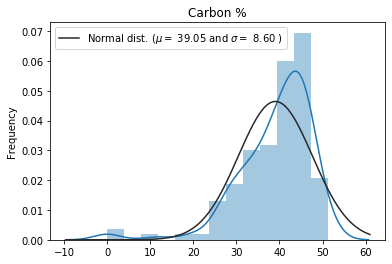

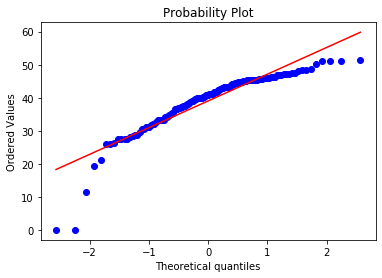

In [0]:
sns.distplot(y_C , fit=norm);

(mu_C, sigma_C) = norm.fit(y_C)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu_C, sigma_C))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu_C, sigma_C)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Carbon %')

fig = plt.figure()
res = stats.probplot(y_C, plot=plt)
plt.show()


 mu = 1.10 and sigma = 0.40



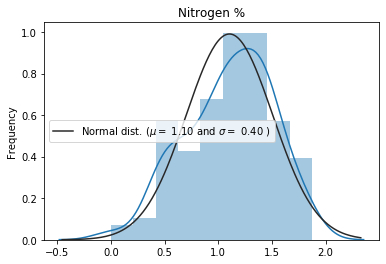

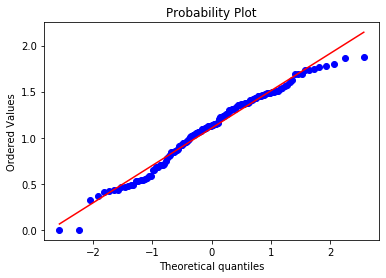

In [0]:
sns.distplot(y_N , fit=norm);

(mu_N, sigma_N) = norm.fit(y_N)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu_N, sigma_N))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu_N, sigma_N)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Nitrogen %')

fig = plt.figure()
res = stats.probplot(y_N, plot=plt)
plt.show()

In [0]:
y_cl = np.multiply(y_C,y_C)

In [0]:
y_nl = y_N


 mu = 1598.95 and sigma = 558.81



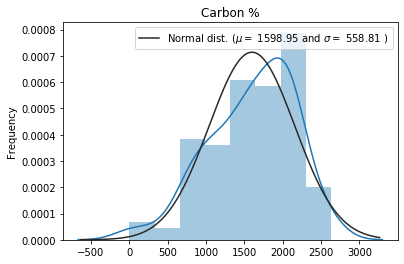

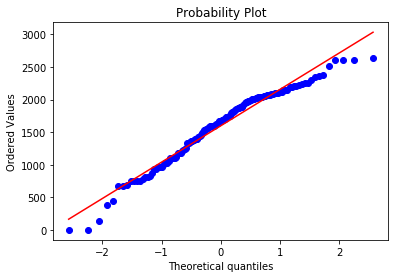

In [0]:
sns.distplot(y_cl , fit=norm);

(mu_cl, sigma_cl) = norm.fit(y_cl)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu_cl, sigma_cl))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu_cl, sigma_cl)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Carbon %')

fig = plt.figure()
res = stats.probplot(y_cl, plot=plt)
plt.show()

In [0]:
print(skew(y_cl))
print(kurtosis(y_cl))

-0.5676785397011854
-0.09188919650160043


In [0]:
print(skew(y_nl))
print(kurtosis(y_nl))

-0.37818983330652123
-0.4179268673597023


In [0]:
train.drop(['TN (%)','TC (%)'],axis=1,inplace=True)

In [0]:
train.head()

,Zn,S,K,Ca,Ti,Mn,Fe,Rb,Sr,Al,Si,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,...,2460,2461,2462,2463,2464,2465,2466,2467,2468,2469,2470,2471,2472,2473,2474,2475,2476,2477,2478,2479,2480,2481,2482,2483,2484,2485,2486,2487,2488,2489,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
0,36.5,1451,2397,21414,172,780,1609,9.7,29.2,10062.13,39006.40,-0.004079,-0.003135,-0.002168,-0.002767,-0.002948,-0.002317,-0.001404,-0.002922,-0.005383,-0.005025,-0.004544,-0.004881,-0.004034,-0.003412,-0.003799,-0.003373,-0.003005,-0.003656,-0.003032,-0.002170,-0.003135,-0.003527,-0.002916,-0.002812,-0.002507,-0.002034,-0.003077,-0.004081,-0.003589,...,-0.000576,-0.001044,-0.001091,-0.000934,-0.000848,-0.000803,-0.000752,-0.000667,-0.000631,-0.000768,-0.000904,-0.000738,-0.000507,-0.000822,-0.001485,-0.001555,-0.001006,-0.000512,-0.000093,0.000062,-0.000416,-0.000949,-0.001099,-0.001067,-0.000549,0.000333,0.000506,0.000026,-0.000418,-0.000938,-0.001145,-0.000503,0.000179,0.000181,-0.000007,-0.000013,0.000027,0.000090,0.000184,0.000352
1,44.4,1765,3337,18727,414,917,3176,17.0,32.2,14141.88,71818.36,-0.003471,-0.002537,-0.001896,-0.002639,-0.001939,-0.001231,-0.002312,-0.003688,-0.004396,-0.003961,-0.003259,-0.002999,-0.003021,-0.003255,-0.003510,-0.003573,-0.003527,-0.003419,-0.001721,-0.000497,-0.002307,-0.003587,-0.003236,-0.002874,-0.002296,-0.001758,-0.002292,-0.002922,-0.002702,...,-0.000461,-0.001023,-0.001275,-0.001395,-0.001191,-0.000597,-0.000253,-0.000236,-0.000326,-0.000669,-0.001011,-0.000861,-0.000550,-0.000725,-0.001181,-0.001263,-0.000975,-0.000663,-0.000246,-0.000111,-0.000765,-0.001421,-0.001355,-0.000995,-0.000372,0.000496,0.000547,-0.000210,-0.000746,-0.001090,-0.001067,-0.000095,0.000819,0.000664,0.000135,-0.000450,-0.001099,-0.000883,0.000060,0.000469
2,34.6,1156,1919,17868,96,784,999,6.8,25.7,4507.87,19861.80,-0.003583,-0.001364,-0.000901,-0.003630,-0.003770,-0.002516,-0.002768,-0.003846,-0.004875,-0.004790,-0.004655,-0.004620,-0.003281,-0.002915,-0.004434,-0.004534,-0.003710,-0.003444,-0.002790,-0.002308,-0.002774,-0.003749,-0.004310,-0.003520,-0.002256,-0.001714,-0.003065,-0.004099,-0.003145,...,-0.000756,-0.001378,-0.001564,-0.001531,-0.001246,-0.000635,-0.000304,-0.000350,-0.000496,-0.000835,-0.001166,-0.001051,-0.000784,-0.000952,-0.001373,-0.001405,-0.001050,-0.000679,-0.000239,-0.000056,-0.000546,-0.001070,-0.001116,-0.000949,-0.000346,0.000591,0.000583,-0.000369,-0.001029,-0.001392,-0.001360,-0.000317,0.000669,0.000491,-0.000028,-0.000241,-0.000379,-0.000412,-0.000346,-0.000209
3,46.5,1681,3049,22341,295,1404,2744,15.0,36.7,11305.72,46664.46,-0.004181,-0.002686,-0.001405,-0.002709,-0.002877,-0.002210,-0.002098,-0.003256,-0.004591,-0.004042,-0.003600,-0.003940,-0.003474,-0.003439,-0.004290,-0.003876,-0.002956,-0.002829,-0.002416,-0.002019,-0.002273,-0.003256,-0.004057,-0.003266,-0.001842,-0.001149,-0.002448,-0.003726,-0.003190,...,-0.000701,-0.001571,-0.001863,-0.001832,-0.001367,-0.000337,0.000246,0.000259,0.000014,-0.000879,-0.001791,-0.001710,-0.001199,-0.000851,-0.000511,-0.000335,-0.000321,-0.000377,-0.000504,-0.000696,-0.001130,-0.001421,-0.000899,-0.000097,0.000234,0.000337,-0.000035,-0.000996,-0.001522,-0.001519,-0.001166,0.000041,0.001094,0.000779,0.000014,-0.000546,-0.001070,-0.000840,0.000068,0.000070
4,36.9,1403,1818,30621,76,142,725,6.1,25.9,3994.33,10062.41,-0.003205,-0.003155,-0.002608,-0.002792,-0.003441,-0.003500,-0.002449,-0.003126,-0.004800,-0.004774,-0.004039,-0.003691,-0.004293,-0.004599,-0.003989,-0.004253,-0.004248,-0.002836,-0.002288,-0.002755,-0.003121,-0.003664,-0.003882,-0.002924,-0.002390,-0.002974,-0.003378,-0.003623,-0.003790,...,-0.000086,-0.000498,-0.000870,-0.001307,-0.001386,-0.001114,-0.000884,-0.000693,-0.000572,-0.000638,-0.000735,-0.000667,-0.000576,-0.000807,-0.001247,-0.001439,-0.001486,-0.001119,0.000106,0.000872,0.000267,-0.000575,-0.001114,-0.001505,-0.001068,-0.000059,0.000359,0.000327,0.000030,-0.000834,-0.0

In [0]:
numeric_feats = train.dtypes[train.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
1926,10.894619
1925,10.841386
1927,10.839362
1924,10.739837
1928,10.516518
1932,10.468847
1931,10.396780
1923,10.329492
1933,10.042632
1930,10.032985


In [0]:
skewness.shape

(2160, 1)

In [0]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    train[feat] = boxcox1p(train[feat], lam)

There are 2160 skewed numerical features to Box Cox transform


In [0]:
train.head()

,Zn,S,K,Ca,Ti,Mn,Fe,Rb,Sr,Al,Si,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,...,2460,2461,2462,2463,2464,2465,2466,2467,2468,2469,2470,2471,2472,2473,2474,2475,2476,2477,2478,2479,2480,2481,2482,2483,2484,2485,2486,2487,2488,2489,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
0,4.815225,13.203602,14.756621,23.085353,7.774945,11.438661,13.513866,2.846307,4.448341,19.898877,25.885567,-0.004086,-0.003139,-0.002170,-0.002770,-0.002952,-0.002319,-0.001405,-0.002926,-0.005395,-0.005036,-0.004553,-0.004891,-0.004041,-0.003417,-0.003805,-0.003378,-0.003009,-0.003662,-0.003036,-0.002172,-0.003139,-0.003532,-0.002920,-0.002815,-0.002510,-0.002036,-0.003081,-0.004088,-0.003594,...,-0.000576,-0.001044,-0.001092,-0.000934,-0.000848,-0.000803,-0.000752,-0.000667,-0.000631,-0.000768,-0.000904,-0.000738,-0.000507,-0.000822,-0.001486,-0.001556,-0.001006,-0.000512,-0.000093,0.000062,-0.000416,-0.000949,-0.001100,-0.001067,-0.000549,0.000333,0.000506,0.000026,-0.000418,-0.000938,-0.001146,-0.000503,0.000179,0.000181,-0.000007,-0.000013,0.000027,0.000090,0.000184,0.000352
1,5.149242,13.795770,15.846246,22.492993,9.800389,11.882959,15.679927,3.618223,4.607370,21.290259,29.006772,-0.003476,-0.002540,-0.001898,-0.002642,-0.001940,-0.001232,-0.002315,-0.003693,-0.004404,-0.003968,-0.003263,-0.003003,-0.003025,-0.003260,-0.003515,-0.003578,-0.003533,-0.003424,-0.001723,-0.000498,-0.002310,-0.003593,-0.003241,-0.002877,-0.002298,-0.001759,-0.002295,-0.002926,-0.002706,...,-0.000461,-0.001023,-0.001276,-0.001396,-0.001192,-0.000598,-0.000253,-0.000236,-0.000326,-0.000669,-0.001012,-0.000862,-0.000550,-0.000725,-0.001182,-0.001263,-0.000975,-0.000663,-0.000246,-0.000111,-0.000765,-0.001422,-0.001356,-0.000995,-0.000373,0.000496,0.000547,-0.000210,-0.000746,-0.001090,-0.001068,-0.000095,0.000818,0.000664,0.000135,-0.000450,-0.001099,-0.000883,0.000060,0.000469
2,4.726022,12.538087,14.054010,22.288347,6.574447,11.452540,12.122553,2.405749,4.244858,16.884851,22.751446,-0.003588,-0.001365,-0.000902,-0.003636,-0.003776,-0.002519,-0.002771,-0.003853,-0.004885,-0.004800,-0.004664,-0.004629,-0.003286,-0.002919,-0.004442,-0.004543,-0.003716,-0.003449,-0.002793,-0.002310,-0.002777,-0.003755,-0.004318,-0.003525,-0.002258,-0.001715,-0.003069,-0.004106,-0.003149,...,-0.000756,-0.001378,-0.001565,-0.001532,-0.001247,-0.000635,-0.000304,-0.000350,-0.000496,-0.000835,-0.001167,-0.001052,-0.000784,-0.000953,-0.001373,-0.001406,-0.001050,-0.000679,-0.000239,-0.000056,-0.000546,-0.001070,-0.001117,-0.000949,-0.000346,0.000591,0.000582,-0.000369,-0.001029,-0.001393,-0.001361,-0.000318,0.000669,0.000491,-0.000028,-0.000241,-0.000379,-0.000413,-0.000346,-0.000209
3,5.229657,13.646734,15.543597,23.275074,8.986510,13.105770,15.195344,3.438110,4.824389,20.367267,26.772702,-0.004189,-0.002689,-0.001406,-0.002712,-0.002881,-0.002212,-0.002099,-0.003261,-0.004600,-0.004049,-0.003606,-0.003947,-0.003479,-0.003444,-0.004298,-0.003883,-0.002960,-0.002832,-0.002419,-0.002020,-0.002275,-0.003261,-0.004065,-0.003271,-0.001844,-0.001149,-0.002450,-0.003732,-0.003194,...,-0.000701,-0.001572,-0.001864,-0.001834,-0.001368,-0.000338,0.000246,0.000259,0.000014,-0.000879,-0.001793,-0.001711,-0.001199,-0.000852,-0.000511,-0.000335,-0.000321,-0.000378,-0.000504,-0.000696,-0.001131,-0.001422,-0.000899,-0.000098,0.000234,0.000337,-0.000035,-0.000997,-0.001523,-0.001520,-0.001167,0.000041,0.001093,0.000778,0.000014,-0.000546,-0.001070,-0.000840,0.000068,0.000070
4,4.833513,13.103658,13.886732,24.724957,6.123681,7.368228,11.241422,2.278687,4.257079,16.461523,19.898988,-0.003209,-0.003159,-0.002610,-0.002796,-0.003446,-0.003505,-0.002451,-0.003130,-0.004810,-0.004783,-0.004046,-0.003697,-0.004300,-0.004608,-0.003996,-0.004260,-0.004255,-0.002840,-0.002290,-0.002758,-0.003125,-0.003669,-0.003889,-0.002927,-0.002392,-0.002978,-0.003382,-0.003628,-0.003796,...,-0.000086,-0.000498,-0.000870,-0.001308,-0.001387,-0.001114,-0.000884,-

In [0]:
X_1 = train[['Zn','S','K','Ca','Ti','Mn','Fe','Rb','Sr','Al','Si']]
X_2 = train.drop(columns=['Zn','S','K','Ca','Ti','Mn','Fe','Rb','Sr','Al','Si'])

In [0]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split,cross_validate
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import train_test_split

In [0]:
n_folds = 3

def rmsle_cv(model,X,y):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X.values)
    rmse= cross_validate(model, X.values, y, scoring="neg_mean_squared_error", cv = kf,return_train_score=True)
    return(rmse)

In [0]:
model_xgb_x1_cl = xgb.XGBRegressor(colsample_bytree=1, 
                             learning_rate=0.1, max_depth=3, 
                             n_estimators=10000,
                             objective='reg:squarederror',
                             subsample=0.0125, 
                             random_state =7)

score = rmsle_cv(model_xgb_x1_cl,X_1,y_cl)
print(np.sqrt(-score['train_score']))
print(np.sqrt(-score['test_score']))

[291.59363389 254.41492706 262.75286137]
[374.83629686 433.39025346 518.78836308]


In [0]:
model_xgb_x1_nl = xgb.XGBRegressor(colsample_bytree=0.1, 
                             learning_rate=0.1, max_depth=3, 
                             n_estimators=1000,
                             objective='reg:squarederror',
                             subsample=0.0085, 
                             random_state =7)

score = rmsle_cv(model_xgb_x1_nl,X_1,y_nl)
print(np.sqrt(-score['train_score']))
print(np.sqrt(-score['test_score']))

[0.30837253 0.31326145 0.26434348]
[0.47693553 0.32947666 0.46893786]


In [0]:
model_xgb_x2_cl = xgb.XGBRegressor(colsample_bytree=1, 
                             learning_rate=0.01, max_depth=3, 
                             n_estimators=500,
                             objective='reg:squarederror',
                             subsample=0.1, 
                             random_state =7)

score = rmsle_cv(model_xgb_x2_cl,X_2,y_cl)
print(np.sqrt(-score['train_score']))
print(np.sqrt(-score['test_score']))

[317.96870095 307.72115573 213.20143691]
[276.49340911 317.82904647 573.96595678]


In [0]:
model_xgb_x2_nl = xgb.XGBRegressor(colsample_bytree=1, 
                             learning_rate=0.02, max_depth=3, 
                             n_estimators=1000,
                             objective='reg:squarederror',
                             subsample=0.02, 
                             random_state =7)

score = rmsle_cv(model_xgb_x2_nl,X_2,y_nl)
print(np.sqrt(-score['train_score']))
print(np.sqrt(-score['test_score']))

[0.31299339 0.38641805 0.30564135]
[0.47964838 0.36446268 0.49786085]


In [0]:
model_xgb_train_cl = xgb.XGBRegressor(colsample_bytree=1, 
                             learning_rate=0.01, max_depth=3, 
                             n_estimators=500,
                             objective='reg:squarederror',
                             subsample=0.1, 
                             random_state =7)

score = rmsle_cv(model_xgb_train_cl,train,y_cl)
print(np.sqrt(-score['train_score']))
print(np.sqrt(-score['test_score']))

[292.53954819 255.57826961 217.85789269]
[229.98331289 376.68307123 577.18478972]


In [0]:
model_xgb_train_nl = xgb.XGBRegressor(colsample_bytree=1, 
                             learning_rate=0.01, max_depth=3, 
                             n_estimators=1000,
                             objective='reg:squarederror',
                             subsample=0.02, 
                             random_state =7)

score = rmsle_cv(model_xgb_train_nl,train,y_nl)
print(np.sqrt(-score['train_score']))
print(np.sqrt(-score['test_score']))

[0.3165421  0.3454295  0.28725418]
[0.49860055 0.37992405 0.48902401]


In [0]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [0]:
model_xgb_x1_cl.fit(X_1, y_cl)
xgb_pred = model_xgb_x1_cl.predict(X_1)
print(rmsle(y_cl, xgb_pred))
print(rmsle(y_C,np.sqrt(xgb_pred)))

246.4852424895119
4.810784582327536


In [0]:
model_xgb_x2_cl.fit(X_2, y_cl)
xgb_pred = model_xgb_x2_cl.predict(X_2)
print(rmsle(y_cl, xgb_pred))
print(rmsle(y_C,np.sqrt(xgb_pred)))

259.8854411708597
5.275596277762709


In [0]:
model_xgb_train_cl.fit(train, y_cl)
xgb_pred = model_xgb_train_cl.predict(train)
print(rmsle(y_cl, xgb_pred))
print(rmsle(y_C,np.sqrt(xgb_pred)))

228.2657403626201
4.959483783303534


In [0]:
model_xgb_x1_nl.fit(X_1, y_nl)
xgb_pred = model_xgb_x1_nl.predict(X_1)
print(rmsle(y_nl, xgb_pred))

0.2927709176583464


In [0]:
model_xgb_x2_nl.fit(X_2, y_nl)
xgb_pred = model_xgb_x2_nl.predict(X_2)
print(rmsle(y_nl, xgb_pred))

0.3359674924659507


In [0]:
model_xgb_train_nl.fit(train, y_nl)
xgb_pred = model_xgb_train_nl.predict(train)
print(rmsle(y_nl, xgb_pred))

0.31652632121680657
